<h3>Eye blink data feature extraction method</h3>

In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

<hr>
<h3>user1 data extraction</h3>

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

<hr>
<h3>user2 data extraction</h3>

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

<hr>
<h3>Artifact data extraction</h3>

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

<hr>
<h3>Eye blink data preprocessing</h3>

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
print('Number of user1 data', len(user1Data))

Number of user1 data 841


In [23]:
print('Number of user2 data', len(user2Data))

Number of user2 data 1516


In [24]:
print('Number of artifact data', len(user3Data))

Number of artifact data 882


<hr>
<h3>Data sum</h3>

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

<hr>
<h3>Data mixing</h3>

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([0, 0, 0, ..., 1, 1, 1])

<hr>
<h3>Data sharing & create labels</h3>

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

<hr>
<h3>Data regularization</h3>

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

<hr>
<h3>import modules</h3>

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

<hr>
<h3>Make model function</h3>

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        
    if(hidden == 4):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[3], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

<hr>
<h3>result</h3>

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 2   Node:[ 8 , 8 ]  BatchSize: 512   Dropout: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
loss min : 0.315081049601237   

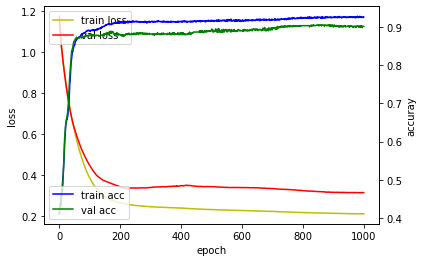

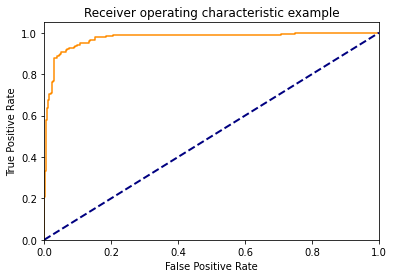


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01939655
 0.01939655 0.0237069  0.0237069  0.02586207 0.02586207 0.02801724
 0.02801724 0.03017241 0.03017241 0.03448276 0.0387931  0.0387931
 0.04310345 0.04310345 0.04741379 0.04741379 0.04956897 0.04956897
 0.06465517 0.06465517 0.06896552 0.06896552 0.07327586 0.07327586
 0.08836207 0.08836207 0.09051724 0.09051724 0.09913793 0.09913793
 0.10775862 0.10775862 0.13362069 0.13362069 0.13793103 0.13793103
 0.15086207 0.15086207 0.15301724 0.15301724 0.17672414 0.18103448
 0.18534483 0.18534483 0.20474138 0.20474138 0.31681034 0.32112069
 0.36422414 0.36853448 0.42456897 0.42887931 0.69181034 0.69612069
 0.70689655 0.70689655 0.74784483 0.74784483 0.95043103 0.95474138
 1.        ]

tpr : [0.         0.00571429 0.20571429 0.20571429 0.33142857 0.33142857
 0.33714286 0.33714286 0.57714286 0.

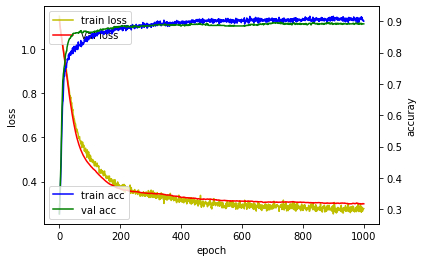

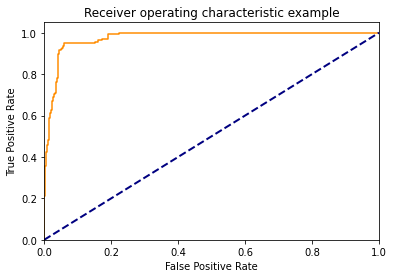


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02586207 0.02586207 0.03017241 0.03017241 0.03232759
 0.03232759 0.03448276 0.03448276 0.03663793 0.03663793 0.0387931
 0.0387931  0.04094828 0.04094828 0.04525862 0.04525862 0.04956897
 0.04956897 0.05172414 0.05172414 0.05603448 0.05603448 0.05818966
 0.05818966 0.06034483 0.06034483 0.15301724 0.15301724 0.15517241
 0.15948276 0.15948276 0.17241379 0.17241379 0.18965517 0.18965517
 0.19827586 0.20905172 0.22413793 0.22413793 0.29956897 0.30387931
 0.3512931  0.35560345 0.45905172 0.46336207 0.67672414 0.68103448
 0.82327586 0.82758621 0.90948276 0.9137931  1.        ]

tpr : [0.         0.00571429 0.21142857 0.21142857 0.35428571 0.35428571
 0.37714286 0.37714286 0.42285714 0.42285714 0.45714286 0.45

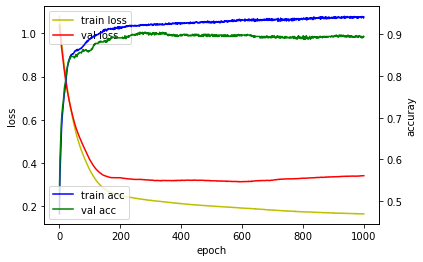

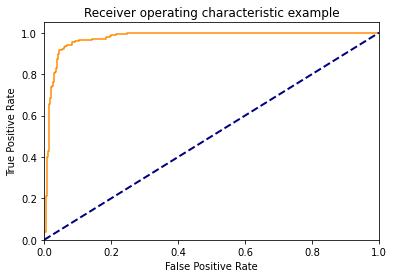


fpr : [0.         0.         0.         0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.03017241 0.03017241 0.03232759 0.03232759 0.03448276
 0.03448276 0.03663793 0.03663793 0.0387931  0.0387931  0.04094828
 0.04094828 0.04525862 0.04525862 0.04956897 0.05387931 0.05387931
 0.05818966 0.05818966 0.06034483 0.06034483 0.0625     0.0625
 0.06896552 0.06896552 0.08189655 0.08189655 0.08405172 0.08405172
 0.09051724 0.09051724 0.10344828 0.10344828 0.14224138 0.14224138
 0.16810345 0.17241379 0.18534483 0.18534483 0.19612069 0.19612069
 0.19827586 0.19827586 0.21551724 0.21551724 0.24784483 0.24784483
 0.3362069  0.34051724 0.45905172 0.46336207 0.65732759 0.66163793
 0.82543103 0.82974138 0.8362069  0.84051724 0.89224138 0.89655172
 0.95043103 0.95474138 1.        ]

tpr : [0.         0.005

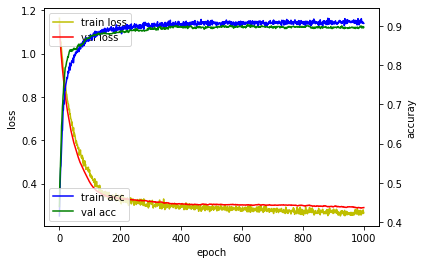

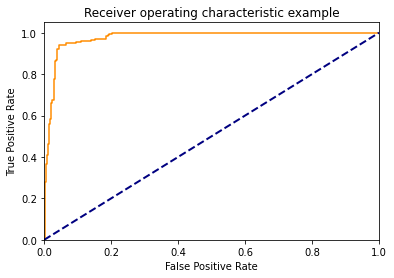


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02801724 0.02801724 0.03232759
 0.03232759 0.03663793 0.03663793 0.0387931  0.0387931  0.04310345
 0.04310345 0.06465517 0.06465517 0.09482759 0.09482759 0.10991379
 0.10991379 0.12715517 0.13146552 0.14008621 0.14008621 0.15301724
 0.15301724 0.18318966 0.18318966 0.19181034 0.19181034 0.19396552
 0.19396552 0.20258621 0.20258621 0.33189655 0.3362069  0.35775862
 0.36206897 0.36422414 0.36853448 0.69396552 0.69827586 0.85344828
 0.85775862 1.        ]

tpr : [0.         0.         0.28       0.28       0.34857143 0.34857143
 0.36571429 0.36571429 0.41142857 0.41142857 0.46285714 0.46285714
 0.56       0.56       0.58285714 0.58285714 0.64571429 0.64571429
 0.66285714 0.66285714 0.67428571 0.67428571 0.77714286 0.77714286
 0.86285714 0.86285714 0

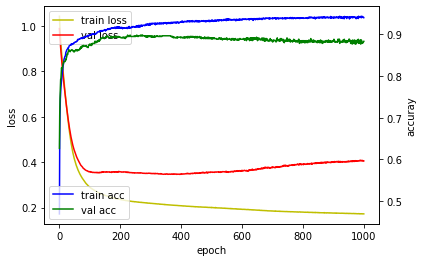

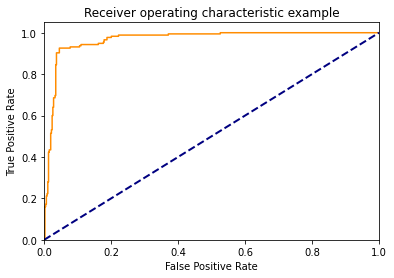


fpr : [0.         0.00215517 0.00215517 0.00215517 0.00431034 0.00431034
 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586
 0.01293103 0.01293103 0.01508621 0.01508621 0.01939655 0.01939655
 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207 0.02586207
 0.02801724 0.02801724 0.03232759 0.03232759 0.03448276 0.03448276
 0.03663793 0.03663793 0.04525862 0.04525862 0.07758621 0.07758621
 0.10560345 0.10560345 0.10991379 0.10991379 0.12068966 0.125
 0.16163793 0.16163793 0.17672414 0.17672414 0.17887931 0.17887931
 0.18103448 0.18534483 0.1875     0.1875     0.20043103 0.20043103
 0.22198276 0.22198276 0.35991379 0.36637931 0.37068966 0.37068966
 0.38793103 0.39224138 0.52586207 0.52586207 0.53663793 0.54094828
 0.59698276 0.6012931  0.68318966 0.6875     0.89655172 0.90086207
 0.91163793 0.91594828 0.92025862 0.92456897 0.94396552 0.94827586
 0.95474138 0.95905172 0.98060345 0.98491379 1.        ]

tpr : [0.         0.01142857 0.02285714 0.16       0.16       0.17142

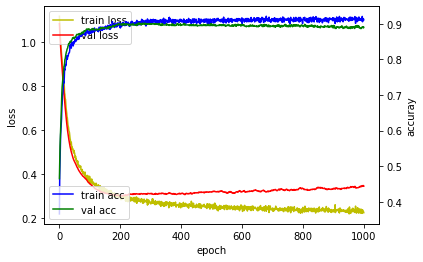

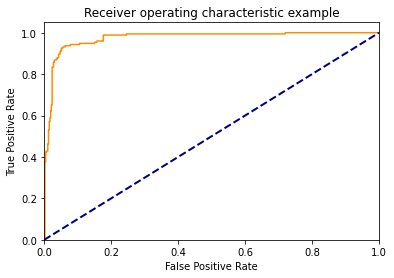


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02801724 0.02801724 0.03017241
 0.03017241 0.03663793 0.03663793 0.0387931  0.0387931  0.04310345
 0.04310345 0.04741379 0.04741379 0.04956897 0.04956897 0.05172414
 0.05172414 0.05603448 0.05603448 0.0625     0.0625     0.07758621
 0.07758621 0.10560345 0.10560345 0.15086207 0.15086207 0.15732759
 0.15732759 0.17025862 0.17456897 0.17672414 0.17672414 0.24568966
 0.24568966 0.38577586 0.39008621 0.42241379 0.42672414 0.63793103
 0.64224138 0.71982759 0.71982759 0.7737069  0.77801724 0.87715517
 0.88146552 1.        ]

tpr : [0.         0.00571429 0.37714286 0.37714286 0.42285714 0.42285714
 0.42857143 0.42857143 0.46285714 0.46285714 0.53142857 0.53142857
 0.57142857 0.57142857 0.58857143 0.58857143 0.62285714 0.62285714
 0.65142857 0.65142857 0

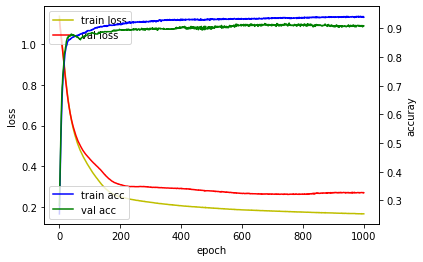

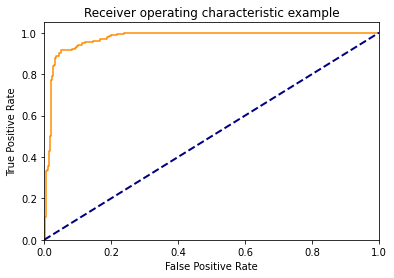


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.02801724 0.03232759 0.03232759 0.03448276
 0.03448276 0.04310345 0.04310345 0.04525862 0.04525862 0.04956897
 0.04956897 0.08405172 0.08405172 0.09051724 0.09051724 0.09482759
 0.09482759 0.09698276 0.09698276 0.1012931  0.1012931  0.11422414
 0.11422414 0.12284483 0.12284483 0.14439655 0.14439655 0.16810345
 0.16810345 0.1875     0.1875     0.19396552 0.19396552 0.19827586
 0.19827586 0.21767241 0.21767241 0.23706897 0.23706897 0.43318966
 0.4375     0.48491379 0.48922414 0.58189655 0.5862069  0.66594828
 0.67025862 0.89655172 0.90086207 1.        ]

tpr : [0.         0.         0.10857143 0.10857143 0.32571429 0.32571429
 0.33142857 0.33142857 0.33714286 0.33714286 0.35428571 0.35428571
 0

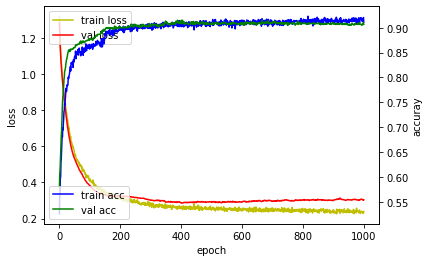

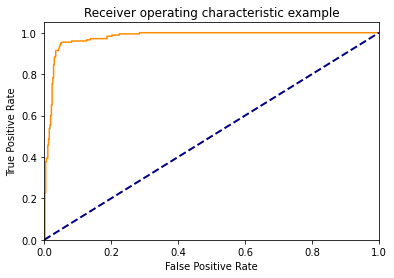


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02586207 0.02586207 0.02801724
 0.02801724 0.03017241 0.03017241 0.03232759 0.03232759 0.03448276
 0.03448276 0.0387931  0.04310345 0.04310345 0.04741379 0.04741379
 0.04956897 0.04956897 0.05172414 0.05172414 0.08189655 0.08189655
 0.12715517 0.12715517 0.13793103 0.13793103 0.1875     0.1875
 0.18965517 0.19396552 0.20258621 0.20258621 0.22413793 0.22413793
 0.28448276 0.28448276 0.36637931 0.37068966 0.39224138 0.39655172
 0.45905172 0.46336207 0.59482759 0.59913793 0.68534483 0.68965517
 0.69827586 0.70258621 0.90732759 0.91163793 1.        ]

tpr : [0.         0.         0.22857143 0.22857143 0.37714286 0.37714286
 0.39428571 0.39428571 0.45714286 0.45714286 0.48571429 0.48571429
 0.53714286 0.53714286 0.55428571 0.55428571 0.6        0.6
 0

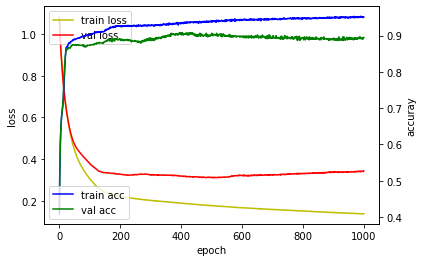

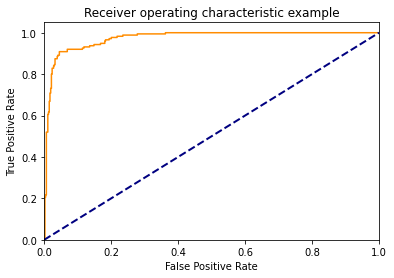


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02801724 0.02801724 0.03017241
 0.03017241 0.03232759 0.03232759 0.0387931  0.0387931  0.04094828
 0.04094828 0.04525862 0.04525862 0.06896552 0.06896552 0.11422414
 0.11422414 0.11853448 0.11853448 0.12068966 0.125      0.13577586
 0.13577586 0.1487069  0.1487069  0.16810345 0.16810345 0.17241379
 0.17672414 0.18103448 0.18103448 0.18318966 0.18318966 0.19396552
 0.19396552 0.20043103 0.20043103 0.21767241 0.21767241 0.23491379
 0.23491379 0.27801724 0.27801724 0.36206897 0.36206897 0.39224138
 0.39655172 0.47844828 0.48275862 0.55818966 0.5625     0.57543103
 0.57974138 0.94181034 0.94612069 1.        ]

tpr : [0.         0.00571429 0.20571429 0.20571429 0.21714286 0.21714286
 0.52       0.52       0.60571429 0.60571429 0.61714286 0.61714286
 0

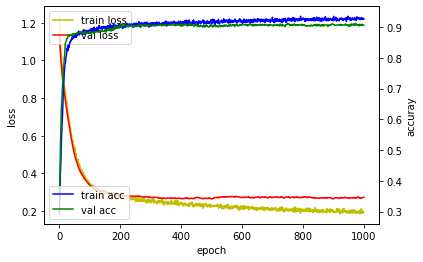

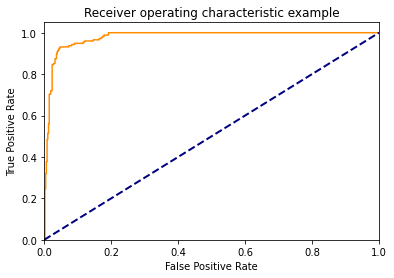


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01939655 0.01939655 0.0237069
 0.0237069  0.02801724 0.02801724 0.03232759 0.03232759 0.03663793
 0.03663793 0.0387931  0.0387931  0.04094828 0.04094828 0.04310345
 0.04310345 0.04525862 0.04525862 0.04741379 0.04741379 0.07327586
 0.07327586 0.08189655 0.08189655 0.09051724 0.09051724 0.11637931
 0.11637931 0.12068966 0.12068966 0.14655172 0.14655172 0.1637931
 0.1637931  0.17025862 0.17025862 0.17456897 0.17456897 0.17887931
 0.17887931 0.19181034 0.19181034 0.19612069 0.20043103 0.44612069
 0.45043103 0.54094828 0.54525862 0.65086207 0.65517241 0.73060345
 0.73491379 0.86206897 0.86637931 0.8987069  0.90301724 1.        ]

tpr : [0.         0.00571429 0.24571429 0.24571429 0.32       0.32
 0.37714286 0.37714286 0.48571429 0.48571429 0.51428571 0.51428571
 0.56       0.56       0.70285714 0.70285714 0.72      

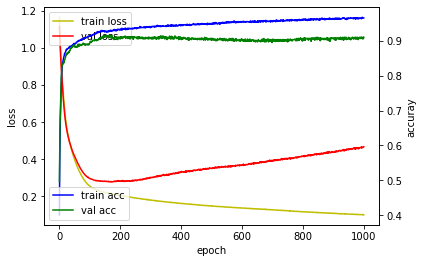

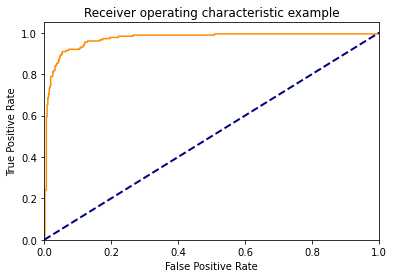


fpr : [0.         0.00215517 0.00215517 0.00215517 0.00215517 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02586207 0.02586207 0.02801724 0.02801724 0.03232759
 0.03232759 0.03663793 0.03663793 0.04094828 0.04094828 0.04310345
 0.04310345 0.04525862 0.04525862 0.04741379 0.04741379 0.05172414
 0.05172414 0.05387931 0.05387931 0.06465517 0.06465517 0.07327586
 0.07327586 0.10560345 0.10560345 0.10991379 0.10991379 0.11637931
 0.11637931 0.11853448 0.11853448 0.12068966 0.12068966 0.12931034
 0.12931034 0.15517241 0.15948276 0.16594828 0.16594828 0.16810345
 0.17241379 0.17456897 0.17456897 0.19612069 0.19612069 0.22198276
 0.22198276 0.26508621 0.26508621 0.28232759 0.28663793 0.47844828
 0.48275862 0.50862069 0.50862069 0.53232759 0.53663793 0.62715517
 0.63146552 0.70258621 0.70689655 0.74568966 0.75       0.80818966
 0.8125     0.83836207 0.84267241 0.93103448 0.93534483

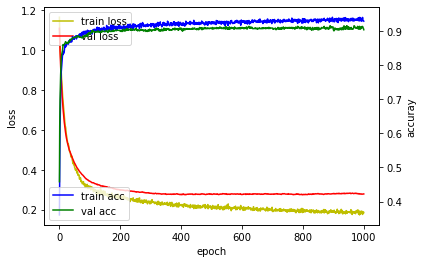

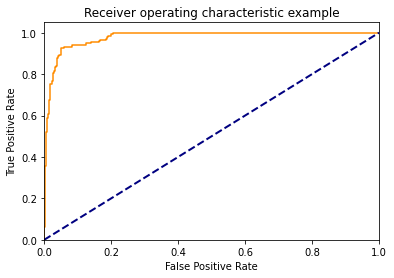


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.0237069  0.0237069  0.02586207 0.02586207 0.03017241
 0.03017241 0.03232759 0.03232759 0.03448276 0.03448276 0.0387931
 0.0387931  0.04094828 0.04094828 0.04310345 0.04310345 0.04956897
 0.04956897 0.05818966 0.05818966 0.08189655 0.08189655 0.08405172
 0.08405172 0.125      0.125      0.14008621 0.14008621 0.1637931
 0.1637931  0.16810345 0.16810345 0.18103448 0.18534483 0.18534483
 0.1875     0.1875     0.19181034 0.19181034 0.19827586 0.19827586
 0.20474138 0.20474138 0.32758621 0.33189655 0.45258621 0.45689655
 0.52155172 0.52586207 0.53663793 0.54094828 0.72413793 0.72844828
 0.8987069  0.90301724 0.92456897 0.92887931 1.        ]

tpr : [0.         0.00571429 0.06285714 0.06285714 0.35428571 0.35428571
 0.42285714 0.42285714 0.52       0.52       0.58857143 0.58

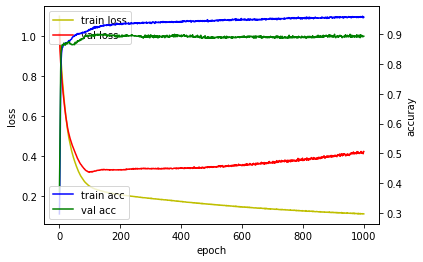

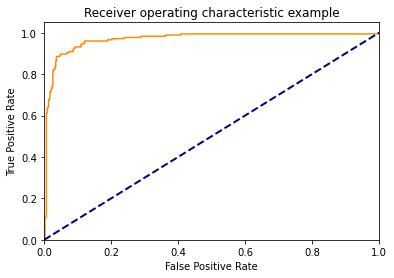


fpr : [0.         0.00215517 0.00215517 0.00646552 0.00646552 0.00862069
 0.00862069 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02586207 0.02586207 0.02801724
 0.02801724 0.03232759 0.03232759 0.03448276 0.03448276 0.03663793
 0.03663793 0.04741379 0.04741379 0.04956897 0.04956897 0.06681034
 0.06681034 0.07327586 0.07327586 0.0862069  0.0862069  0.08836207
 0.08836207 0.09267241 0.09267241 0.10991379 0.10991379 0.11422414
 0.11422414 0.12068966 0.12068966 0.16810345 0.17241379 0.18965517
 0.18965517 0.20258621 0.20258621 0.20905172 0.21336207 0.23922414
 0.23922414 0.27801724 0.28232759 0.2887931  0.2887931  0.32327586
 0.32758621 0.36206897 0.36206897 0.39655172 0.40086207 0.40732759
 0.40732759 0.48060345 0.48491379 0.88577586 0.89008621 0.89439655
 0.8987069  0.91163793 0.91594828 0.92025862 0.92456897 0.93965517
 0.94396552 0.94827586 0.95689655 0.97413793 0.98275862

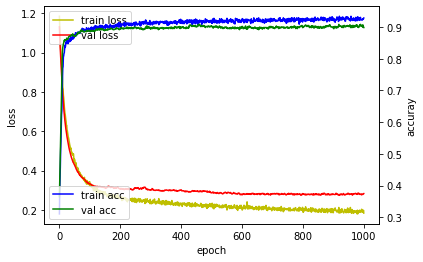

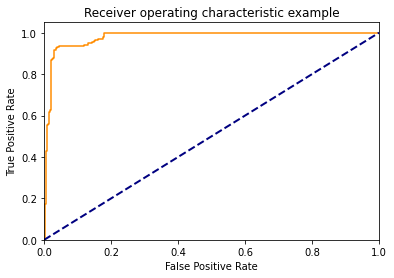


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.02801724 0.03663793 0.03663793 0.0387931
 0.0387931  0.04310345 0.04310345 0.09267241 0.09698276 0.11853448
 0.11853448 0.13146552 0.13146552 0.14224138 0.14224138 0.1487069
 0.1487069  0.15301724 0.15301724 0.16163793 0.16163793 0.17456897
 0.17456897 0.17887931 0.17887931 0.21767241 0.22198276 0.35991379
 0.36422414 0.43103448 0.43534483 0.4375     0.44181034 0.71336207
 0.71767241 0.81896552 0.82327586 0.84913793 0.85344828 0.87284483
 0.87715517 0.88577586 0.89008621 0.92025862 0.92456897 1.        ]

tpr : [0.         0.         0.17142857 0.17142857 0.40571429 0.40571429
 0.42857143 0.42857143 0.55428571 0.55428571 0.56       0.56
 0.57142857 0.57142857 0.61714286 0.61714286 0.62857143

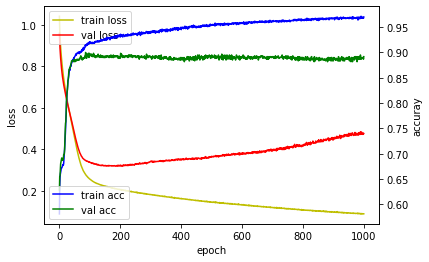

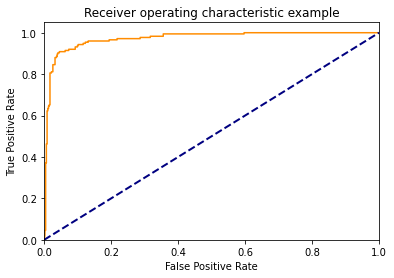


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.02155172
 0.02155172 0.02586207 0.02586207 0.03232759 0.03232759 0.03663793
 0.03663793 0.0387931  0.0387931  0.04094828 0.04094828 0.04525862
 0.04525862 0.0625     0.0625     0.07327586 0.07327586 0.09267241
 0.09267241 0.09913793 0.09913793 0.1012931  0.1012931  0.11637931
 0.11637931 0.12284483 0.12284483 0.125      0.12931034 0.13146552
 0.13146552 0.19396552 0.19396552 0.21767241 0.21767241 0.24137931
 0.24568966 0.28663793 0.28663793 0.31681034 0.31681034 0.35560345
 0.35560345 0.39655172 0.40086207 0.52801724 0.53232759 0.59698276
 0.59698276 0.61853448 0.62284483 0.78663793 0.79094828 0.80172414
 0.80603448 0.92025862 0.92672414 0.96982759 0.97413793 0.99568966
 1.        ]

tpr : [0.         0.02285714 0.04571429 0.04571429 0.37142857 0.37142857
 0.46285714 0.46285714 0.62285714 0

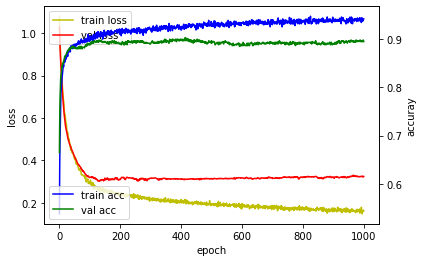

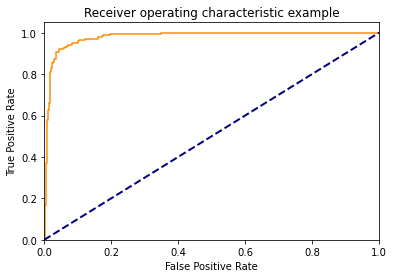


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.02801724 0.03017241 0.03017241 0.03663793
 0.03663793 0.04310345 0.04310345 0.05603448 0.05603448 0.0625
 0.0625     0.06681034 0.06681034 0.07112069 0.07112069 0.08189655
 0.08189655 0.09482759 0.09913793 0.1012931  0.1012931  0.10344828
 0.10344828 0.12068966 0.12068966 0.16163793 0.16163793 0.17241379
 0.17241379 0.17456897 0.17456897 0.19612069 0.19612069 0.19827586
 0.20258621 0.30172414 0.30603448 0.34913793 0.34913793 0.53448276
 0.5387931  0.57758621 0.58189655 0.6012931  0.60560345 0.61853448
 0.62284483 0.72413793 0.72844828 0.79956897 0.80387931 0.81034483
 0.81465517 0.90948276 0.9137931  1.        ]

tpr : [0.         0.         0.16571429 0.16571429 0.27428571 0.27428571
 0.371

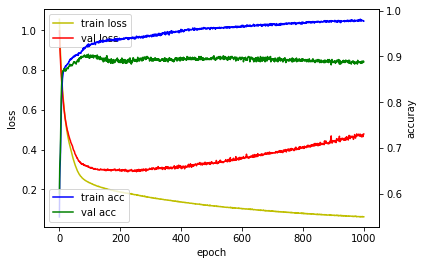

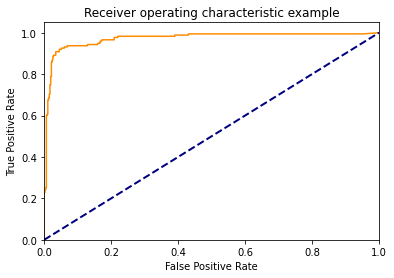


fpr : [0.         0.         0.         0.         0.         0.00215517
 0.00215517 0.00431034 0.00431034 0.00646552 0.00646552 0.00862069
 0.00862069 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02586207 0.02586207 0.02801724
 0.02801724 0.03448276 0.03448276 0.04525862 0.04525862 0.05172414
 0.05172414 0.06034483 0.06034483 0.06896552 0.06896552 0.12931034
 0.12931034 0.15948276 0.15948276 0.16594828 0.16594828 0.16810345
 0.16810345 0.17241379 0.17241379 0.20905172 0.20905172 0.21982759
 0.21982759 0.24784483 0.25215517 0.25646552 0.26077586 0.39008621
 0.39008621 0.43103448 0.43103448 0.47413793 0.47844828 0.49353448
 0.49784483 0.67025862 0.67887931 0.70474138 0.70905172 0.71551724
 0.71982759 0.7262931  0.73491379 0.74137931 0.74784483 0.75
 0.75431034 0.75646552 0.76077586 0.76508621 0.76939655 0.77155172
 0.77586207 0.7887931  0.79310345 0.79525862 0.80387931 0.810

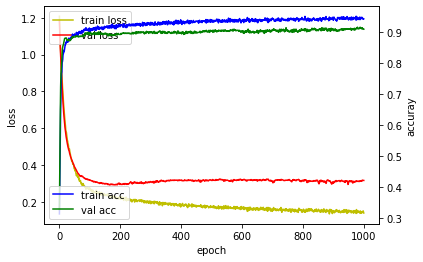

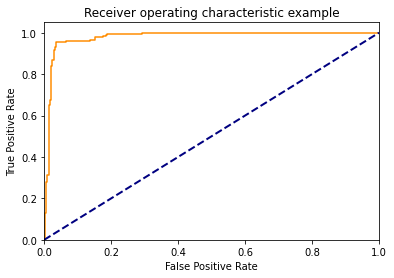


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.02155172
 0.02155172 0.0237069  0.0237069  0.02801724 0.02801724 0.03017241
 0.03017241 0.03232759 0.03232759 0.03448276 0.03448276 0.03663793
 0.03663793 0.06465517 0.06465517 0.13577586 0.13577586 0.14655172
 0.15086207 0.15301724 0.15301724 0.17672414 0.17672414 0.18318966
 0.18318966 0.1875     0.1875     0.21551724 0.21982759 0.29310345
 0.29310345 0.32543103 0.32974138 0.42456897 0.42887931 0.62284483
 0.62715517 0.80603448 0.81034483 0.8987069  0.90301724 0.91163793
 0.92025862 0.92456897 0.93534483 0.93965517 0.94827586 0.95258621
 0.96336207 0.96767241 0.9762931  0.98060345 1.        ]

tpr : [0.         0.         0.13142857 0.13142857 0.21142857 0.21142857
 0.28       0.28       0.31428571 0.31428571 0.64571429 0.64571429
 0.65142857 0.65142857 0.67428571 0.67428571 0.80571429 0.

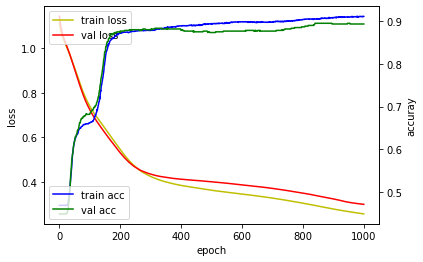

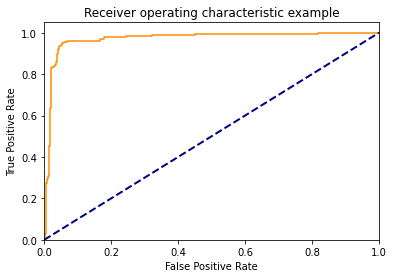


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02801724 0.02801724 0.03232759 0.03232759 0.03663793
 0.03663793 0.0387931  0.0387931  0.04094828 0.04094828 0.04310345
 0.04310345 0.04956897 0.04956897 0.05172414 0.05172414 0.05818966
 0.05818966 0.06681034 0.06681034 0.09267241 0.09698276 0.16594828
 0.16594828 0.16810345 0.16810345 0.17887931 0.17887931 0.24353448
 0.24353448 0.2887931  0.29310345 0.32327586 0.32327586 0.45043103
 0.45043103 0.51077586 0.51508621 0.63793103 0.64224138 0.70905172
 0.71336207 0.81681034 0.81681034 0.92887931 0.93318966 1.        ]

tpr : [0.         0.00571429 0.01142857 0.01142857 0.02857143 0.02857143
 0.08571429 0.08571429 0.27428571 0.27428571 0.29142857 0.29142857
 0.30857143 0.30857143 0.40571429 0.40571429 0.4

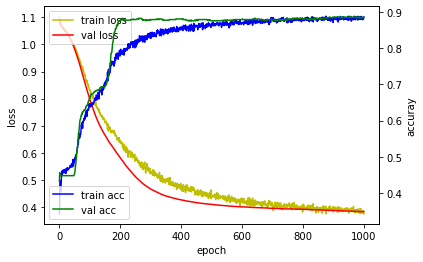

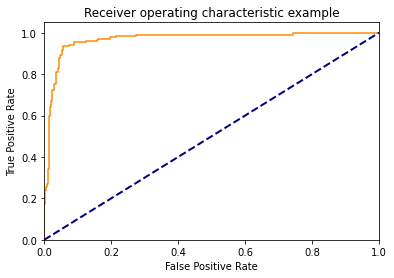


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.02155172 0.02155172 0.0237069  0.0237069  0.02801724
 0.02801724 0.03448276 0.03448276 0.03663793 0.03663793 0.04094828
 0.04094828 0.04310345 0.04310345 0.04525862 0.04525862 0.04741379
 0.04741379 0.05387931 0.05387931 0.05603448 0.05603448 0.06034483
 0.06465517 0.07327586 0.07327586 0.08836207 0.08836207 0.125
 0.125      0.15732759 0.15732759 0.16163793 0.16163793 0.16594828
 0.19612069 0.19612069 0.21336207 0.21336207 0.2737069  0.2737069
 0.49568966 0.5        0.6637931  0.66810345 0.72198276 0.7262931
 0.74353448 0.74353448 0.91810345 0.92241379 1.        ]

tpr : [0.         0.00571429 0.17142857 0.17142857 0.24       0.24
 0.25142857 0.25142857 0.25714286 0.25714286 0.26857143 0.26857143
 0.34285714 0.34285714 0.39428571 0.39428571 0.6        0.6
 0.64      

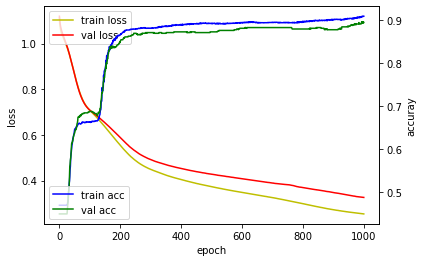

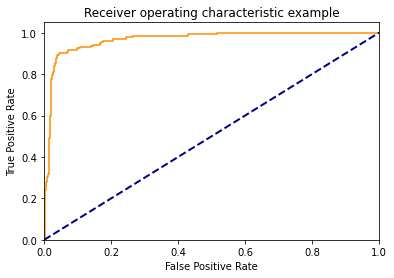


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00862069
 0.00862069 0.01077586 0.01077586 0.01293103 0.01293103 0.01508621
 0.01508621 0.01724138 0.01724138 0.01939655 0.01939655 0.0237069
 0.0237069  0.02586207 0.02586207 0.02801724 0.02801724 0.03017241
 0.03017241 0.03232759 0.03232759 0.03448276 0.03448276 0.03663793
 0.03663793 0.0387931  0.0387931  0.04310345 0.04310345 0.05603448
 0.06034483 0.06896552 0.06896552 0.07112069 0.07112069 0.09698276
 0.09698276 0.10775862 0.10775862 0.14008621 0.14008621 0.14655172
 0.14655172 0.15086207 0.15517241 0.16810345 0.16810345 0.17025862
 0.17025862 0.17456897 0.17456897 0.20474138 0.20474138 0.24353448
 0.24353448 0.26508621 0.26508621 0.39224138 0.39655172 0.42887931
 0.42887931 0.45474138 0.45905172 0.47198276 0.4762931  0.51724138
 0.51724138 0.74568966 0.75       0.85991379 0.86422414 1.        ]

tpr : [0.         0.         0.24       0.24       0.28       0.28
 0.30285714 0.30285714 0.32       0.32       0.4457142

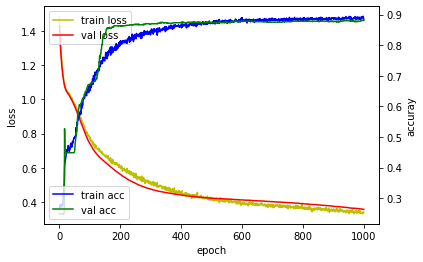

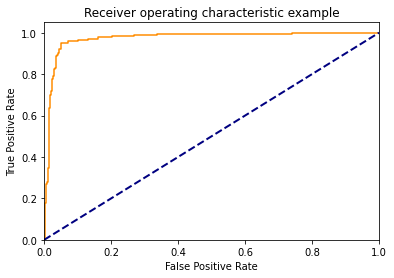


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.02801724 0.03232759 0.03232759 0.03448276
 0.03448276 0.03663793 0.03663793 0.0387931  0.0387931  0.04094828
 0.04094828 0.04525862 0.04525862 0.04956897 0.04956897 0.05172414
 0.05603448 0.07112069 0.07112069 0.1012931  0.1012931  0.13146552
 0.13146552 0.15948276 0.15948276 0.20258621 0.20258621 0.24784483
 0.25215517 0.26724138 0.26724138 0.3362069  0.3362069  0.46551724
 0.46982759 0.58405172 0.58836207 0.70043103 0.70474138 0.73922414
 0.73922414 0.89008621 0.89439655 1.        ]

tpr : [0.         0.         0.17714286 0.17714286 0.25714286 0.25714286
 0.26857143 0.26857143 0.28       0.28       0.34857143 0.34857143
 0.4        0.4        0.63428571 0.63428571 0.69714286 0.69714286
 0

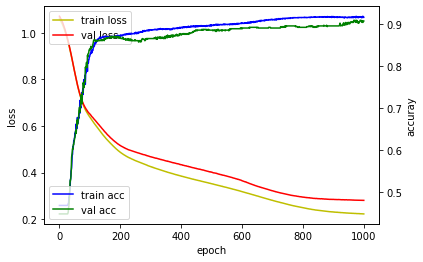

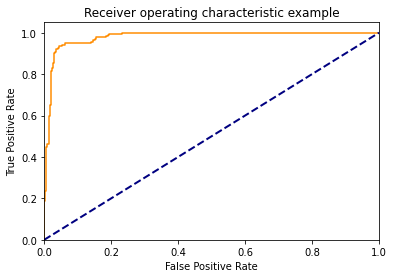


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01293103
 0.01293103 0.01724138 0.01724138 0.01939655 0.01939655 0.0237069
 0.0237069  0.02586207 0.02586207 0.02801724 0.02801724 0.03017241
 0.03017241 0.03232759 0.03232759 0.03663793 0.03663793 0.04094828
 0.04094828 0.04310345 0.04310345 0.05387931 0.05387931 0.0625
 0.0625     0.14008621 0.14008621 0.14439655 0.14439655 0.1487069
 0.15086207 0.15086207 0.15517241 0.15517241 0.18534483 0.18534483
 0.18965517 0.18965517 0.19396552 0.19396552 0.23275862 0.23275862
 0.41163793 0.41594828 0.42456897 0.42887931 0.56681034 0.57112069
 0.61422414 0.61853448 0.87284483 0.87715517 1.        ]

tpr : [0.         0.00571429 0.18857143 0.18857143 0.23428571 0.23428571
 0.26857143 0.26857143 0.44571429 0.44571429 0.46285714 0.46285714
 0.6        0.6        0.65142857 0.65142857 0.81714286 0.81714286
 0.82857143 0.82857143 0.85142857 0.85142857 0.89142857 0.891428

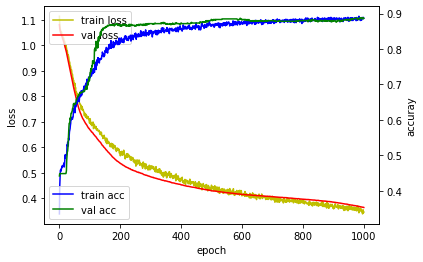

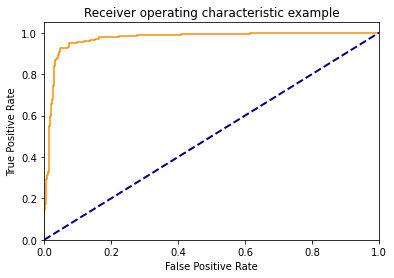


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02586207 0.02586207 0.02801724 0.02801724 0.03017241
 0.03017241 0.03232759 0.03232759 0.03448276 0.03448276 0.0387931
 0.0387931  0.04094828 0.04094828 0.04310345 0.04310345 0.04525862
 0.04525862 0.04741379 0.04741379 0.07112069 0.07112069 0.07327586
 0.07327586 0.07974138 0.08405172 0.09698276 0.09698276 0.11853448
 0.11853448 0.13577586 0.13577586 0.15301724 0.15301724 0.1637931
 0.1637931  0.22413793 0.22413793 0.25       0.25431034 0.27586207
 0.27586207 0.36206897 0.36637931 0.40732759 0.40732759 0.61422414
 0.61422414 0.70905172 0.71336207 0.73706897 0.74137931 0.89008621
 0.89439655 1.        ]

tpr : [0.         0.00571429 0.14285714 0.14285714 0.17142857 0.17142857
 0.26285714 0.26285714 0.29

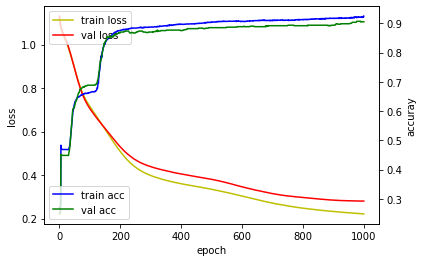

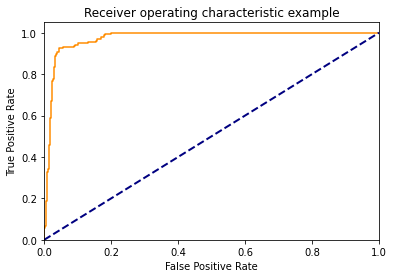


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02586207 0.02586207 0.02801724 0.02801724 0.03232759
 0.03232759 0.03448276 0.03448276 0.03663793 0.03663793 0.0387931
 0.0387931  0.04310345 0.04310345 0.04525862 0.04525862 0.05603448
 0.05603448 0.08836207 0.08836207 0.09267241 0.09267241 0.1012931
 0.1012931  0.13146552 0.13146552 0.15517241 0.15517241 0.15732759
 0.15732759 0.17025862 0.17025862 0.17887931 0.17887931 0.18103448
 0.18103448 0.1875     0.19181034 0.20043103 0.20043103 0.3362069
 0.34051724 0.37715517 0.38146552 0.4762931  0.48060345 0.64655172
 0.65086207 0.93534483 0.93965517 1.        ]

tpr : [0.         0.00571429 0.05714286 0.05714286 0.06857143 0.06857143
 0.18285714 0.18285714 0.18857143 0.18857143 0.32571429 0.32571429
 0.342

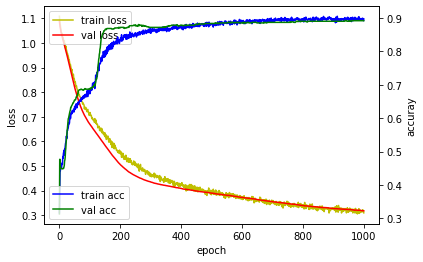

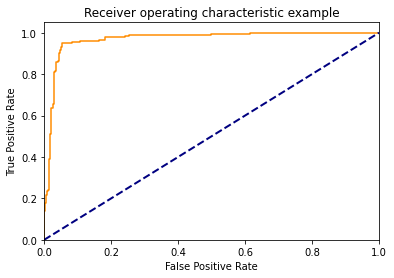


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.02586207 0.02586207 0.02801724
 0.02801724 0.03017241 0.03017241 0.03232759 0.03232759 0.03448276
 0.03448276 0.03663793 0.03663793 0.04094828 0.04094828 0.04310345
 0.04310345 0.04525862 0.04525862 0.04741379 0.04741379 0.04956897
 0.04956897 0.05172414 0.05172414 0.08405172 0.08405172 0.09482759
 0.09913793 0.10775862 0.10775862 0.1637931  0.1637931  0.18103448
 0.18103448 0.24137931 0.24137931 0.25431034 0.25431034 0.28017241
 0.28448276 0.49784483 0.49784483 0.57974138 0.58405172 0.61422414
 0.61422414 0.62284483 0.62715517 0.66163793 0.66594828 0.95689655
 0.9612069  1.        ]

tpr : [0.         0.00571429 0.13714286 0.13714286 0.17714286 0.17714286
 0.21714286 0.21714286 0.23428571 0.23428571 0.24       0.24
 0.38285714 0.38285714 0.38857

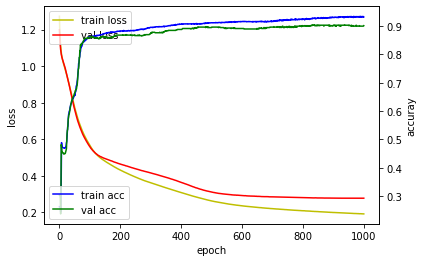

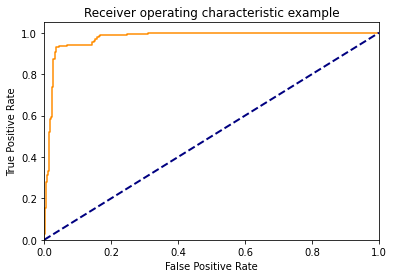


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.03232759 0.03232759 0.03448276 0.03448276
 0.03663793 0.03663793 0.04525862 0.04525862 0.06681034 0.06681034
 0.14224138 0.14224138 0.1487069  0.1487069  0.15086207 0.15086207
 0.15732759 0.15732759 0.1637931  0.1637931  0.16810345 0.16810345
 0.18103448 0.18534483 0.24784483 0.24784483 0.31034483 0.31034483
 0.33405172 0.33836207 0.35775862 0.36206897 0.46767241 0.47198276
 0.63362069 0.63793103 0.92456897 0.92887931 1.        ]

tpr : [0.         0.00571429 0.02857143 0.02857143 0.15428571 0.15428571
 0.17142857 0.17142857 0.28       0.28       0.31428571 0.31428571
 0.33142857 0.33142857 0.34857143 0.34857143 0.52       0.52
 0.58285714 0.58285714 0.59428571 0.59428571 0.73714286 0.737142

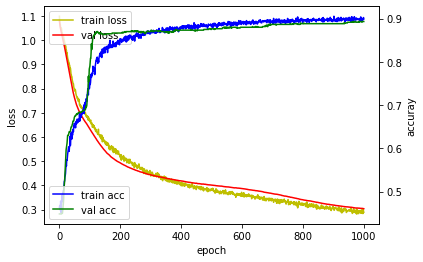

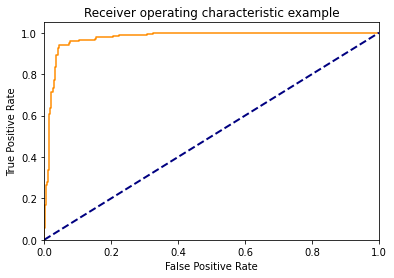


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.02586207
 0.02586207 0.02801724 0.02801724 0.03017241 0.03017241 0.03232759
 0.03232759 0.03448276 0.03448276 0.03663793 0.03663793 0.04094828
 0.04094828 0.04525862 0.04525862 0.05818966 0.0625     0.07543103
 0.07543103 0.07758621 0.07758621 0.10344828 0.10344828 0.15086207
 0.15086207 0.15517241 0.15517241 0.20689655 0.20689655 0.22413793
 0.22413793 0.26508621 0.26939655 0.30818966 0.30818966 0.32543103
 0.32543103 0.48491379 0.48922414 0.63146552 0.63577586 0.6637931
 0.66810345 0.94612069 0.95043103 1.        ]

tpr : [0.         0.00571429 0.05714286 0.05714286 0.16571429 0.16571429
 0.24571429 0.24571429 0.26285714 0.26285714 0.28       0.28
 0.33714286 0.33714286 0.50285714 0.50285714 0.60571429 0.60571429
 0.634285

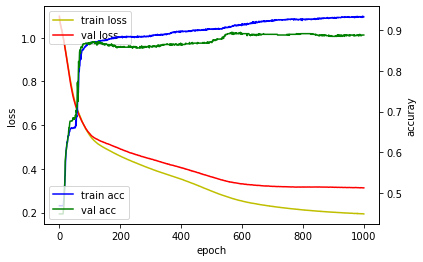

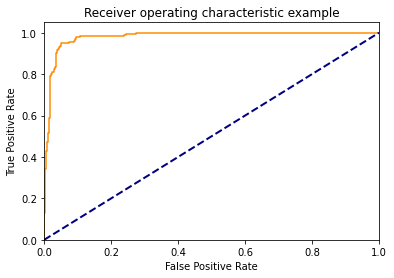


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02801724 0.02801724 0.03232759 0.03232759 0.03448276
 0.03448276 0.03663793 0.03663793 0.0387931  0.0387931  0.04094828
 0.04094828 0.04310345 0.04310345 0.04525862 0.04525862 0.04741379
 0.04741379 0.04956897 0.04956897 0.07327586 0.07327586 0.08836207
 0.08836207 0.09051724 0.09051724 0.09482759 0.09482759 0.10775862
 0.10775862 0.19181034 0.19612069 0.23706897 0.23706897 0.24353448
 0.24353448 0.2737069  0.2737069  0.2887931  0.29310345 0.44612069
 0.45043103 0.57974138 0.58405172 0.67025862 0.67456897 0.80172414
 0.80603448 0.88793103 0.89224138 1.        ]

tpr : [0.         0.00571429 0.13142857 0.13142857 0.34285714 0.34285714
 0.42285714 0.42285714 0.42857143 0.42857143 0.47428571 0.47428571
 0.

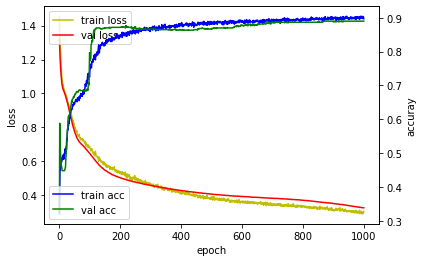

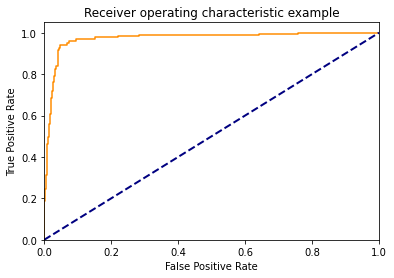


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.02801724 0.02801724 0.03017241 0.03017241 0.03232759
 0.03232759 0.03448276 0.03448276 0.03663793 0.03663793 0.04094828
 0.04094828 0.04310345 0.04310345 0.04741379 0.04741379 0.04956897
 0.05387931 0.06681034 0.06681034 0.07327586 0.07327586 0.09482759
 0.09482759 0.15301724 0.15301724 0.21982759 0.21982759 0.27155172
 0.27586207 0.28448276 0.28448276 0.53017241 0.53448276 0.59051724
 0.59482759 0.64224138 0.64224138 0.66810345 0.67241379 0.75862069
 0.75862069 0.94181034 0.94612069 1.        ]

tpr : [0.         0.00571429 0.18857143 0.18857143 0.24571429 0.24571429
 0.29714286 0.29714286 0.31428571 0.31428571 0.46285714 0.46285714
 0.49714286 0.49714286 0.52571429 0.52571429 0.56       0.56
 0.60571

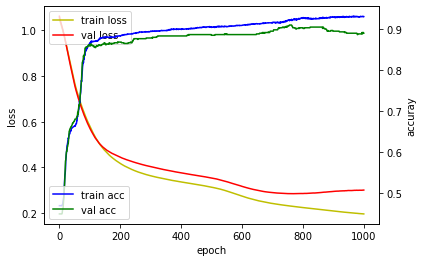

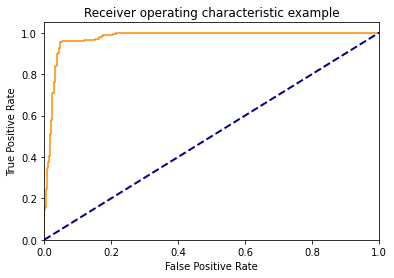


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02801724
 0.02801724 0.03017241 0.03017241 0.03232759 0.03232759 0.0387931
 0.0387931  0.04094828 0.04094828 0.04310345 0.04310345 0.04525862
 0.04525862 0.04741379 0.04741379 0.05172414 0.05172414 0.11853448
 0.11853448 0.15086207 0.15086207 0.1637931  0.1637931  0.17241379
 0.17241379 0.17456897 0.17456897 0.17672414 0.18103448 0.20474138
 0.20474138 0.21336207 0.21336207 0.33405172 0.33836207 0.3512931
 0.35560345 0.48275862 0.48706897 0.59051724 0.59482759 0.83405172
 0.83836207 0.90517241 0.90948276 1.        ]

tpr : [0.         0.00571429 0.14285714 0.14285714 0.16       0.16
 0.2        0.2        0.24571429 0.24571429 0.34857143 0.34857143
 0.37714286 0.37714286 0.40571429 0.40571429 0.50857143 0.50857143
 0.5485714

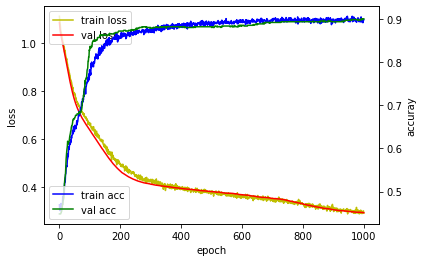

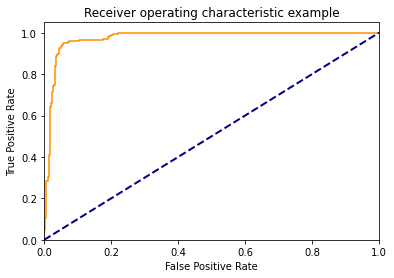


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.03017241 0.03017241 0.03232759 0.03232759 0.03448276
 0.03448276 0.0387931  0.0387931  0.04094828 0.04525862 0.04525862
 0.04956897 0.04956897 0.05172414 0.05172414 0.05603448 0.05603448
 0.07112069 0.07112069 0.07543103 0.07543103 0.10344828 0.10344828
 0.12931034 0.13362069 0.17672414 0.17672414 0.18965517 0.18965517
 0.19396552 0.19396552 0.19827586 0.19827586 0.20474138 0.20474138
 0.21982759 0.21982759 0.29310345 0.29741379 0.47844828 0.48275862
 0.51293103 0.51724138 0.54094828 0.54525862 0.70258621 0.70689655
 0.88362069 0.88793103 0.93534483 0.93965517 0.94827586 0.95258621
 1.        ]

tpr : [0.         0.00571429 0.04571429 0.04571429 0.10285714 0.10285714
 0.16571429 0.16571429 0.28571429 0

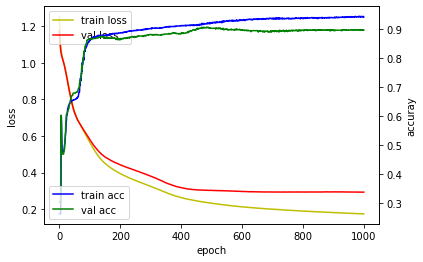

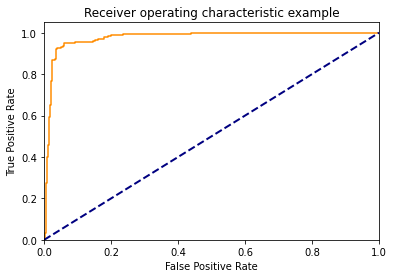


fpr : [0.         0.00215517 0.00215517 0.00431034 0.00431034 0.00646552
 0.00646552 0.00862069 0.00862069 0.01077586 0.01077586 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.03017241 0.03232759 0.03232759 0.03448276 0.03448276 0.03663793
 0.03663793 0.0387931  0.0387931  0.04956897 0.04956897 0.05603448
 0.05603448 0.05818966 0.05818966 0.09051724 0.09051724 0.14439655
 0.14439655 0.15301724 0.15301724 0.16163793 0.16163793 0.17887931
 0.17887931 0.18965517 0.18965517 0.19827586 0.19827586 0.20689655
 0.2112069  0.23491379 0.23491379 0.35991379 0.36422414 0.36637931
 0.37068966 0.4375     0.4375     0.53017241 0.53448276 0.54525862
 0.54956897 0.92672414 0.93103448 1.        ]

tpr : [0.         0.         0.03428571 0.03428571 0.06285714 0.06285714
 0.27428571 0.27428571 0.4        0.4        0.45714286 0.45714286
 0.57142857 0.57142857 0.59428571 0.59428571 0.65142857 0.65142857
 0

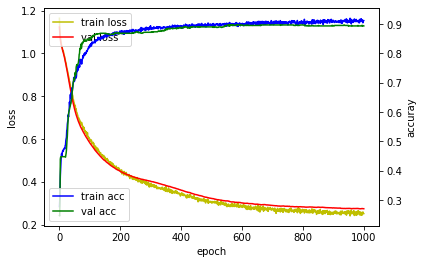

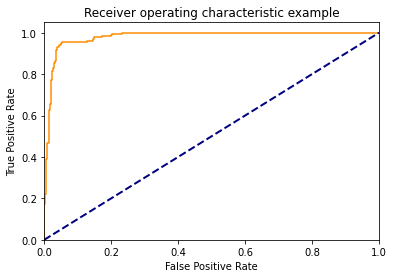


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01293103
 0.01293103 0.01508621 0.01508621 0.01724138 0.01724138 0.01939655
 0.01939655 0.02155172 0.02155172 0.0237069  0.0237069  0.02586207
 0.02586207 0.03017241 0.03017241 0.03232759 0.03232759 0.03448276
 0.03448276 0.03663793 0.03663793 0.0387931  0.0387931  0.04310345
 0.04310345 0.04956897 0.04956897 0.05172414 0.05172414 0.12931034
 0.12931034 0.14655172 0.14655172 0.1487069  0.1487069  0.1637931
 0.16810345 0.17241379 0.17241379 0.19827586 0.19827586 0.20258621
 0.20258621 0.23275862 0.23275862 0.2887931  0.29310345 0.40517241
 0.40948276 0.55818966 0.5625     0.68103448 0.68534483 0.71767241
 0.72198276 0.92241379 0.92672414 0.95258621 0.95689655 1.        ]

tpr : [0.         0.00571429 0.17142857 0.17142857 0.22285714 0.22285714
 0.32571429 0.32571429 0.38857143 0.38857143 0.46857143 0.46857143
 0.48       0.48       0.62857143 0.62857143 0.6

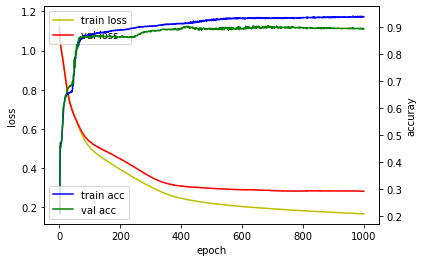

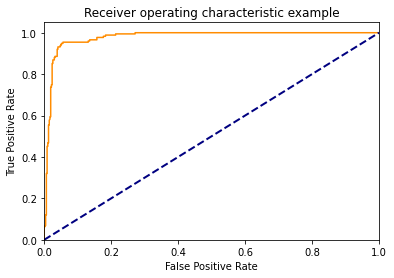


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00431034
 0.00431034 0.00646552 0.00646552 0.00862069 0.00862069 0.01077586
 0.01077586 0.01293103 0.01293103 0.01508621 0.01508621 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02586207 0.02586207 0.03017241 0.03017241 0.03232759
 0.03232759 0.03448276 0.0387931  0.0387931  0.04094828 0.04094828
 0.04741379 0.04741379 0.04956897 0.04956897 0.05172414 0.05172414
 0.05603448 0.05603448 0.13146552 0.13146552 0.13577586 0.13577586
 0.15732759 0.15732759 0.17672414 0.17672414 0.18318966 0.18318966
 0.1875     0.21336207 0.21336207 0.27155172 0.27155172 0.34698276
 0.3512931  0.43318966 0.4375     0.49784483 0.50215517 0.51293103
 0.51724138 0.62715517 0.63146552 0.90086207 0.90517241 0.9612069
 0.96551724 1.        ]

tpr : [0.         0.00571429 0.06285714 0.06285714 0.06857143 0.06857143
 0.12       0.12       0.32       0.32       0.45142857 0.45142857
 0.46857143 0.46857143 0.5

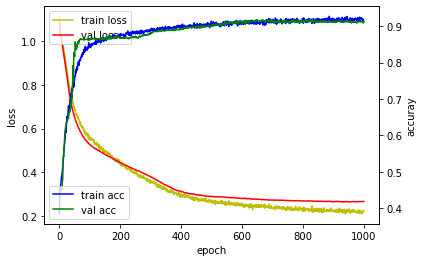

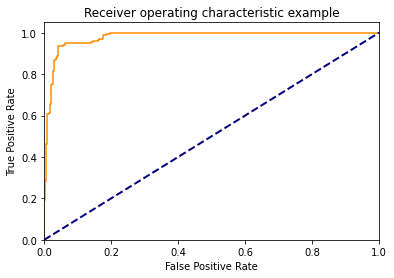


fpr : [0.         0.         0.         0.00215517 0.00215517 0.00646552
 0.00646552 0.00862069 0.00862069 0.01293103 0.01293103 0.01724138
 0.01724138 0.01939655 0.01939655 0.02155172 0.02155172 0.0237069
 0.0237069  0.02586207 0.02586207 0.02801724 0.02801724 0.03017241
 0.03017241 0.03448276 0.03448276 0.03663793 0.03663793 0.0387931
 0.0387931  0.04094828 0.04094828 0.05603448 0.05603448 0.0625
 0.0625     0.14008621 0.14008621 0.14439655 0.14439655 0.15948276
 0.15948276 0.1637931  0.1637931  0.17456897 0.17456897 0.18318966
 0.18318966 0.1875     0.19612069 0.19612069 0.35560345 0.35991379
 0.38146552 0.38577586 0.5237069  0.52801724 0.59698276 0.6012931
 0.70043103 0.70474138 0.8987069  0.90301724 0.94396552 0.94827586
 0.97413793 0.97844828 0.98922414 0.99784483 1.        ]

tpr : [0.         0.00571429 0.19428571 0.19428571 0.28571429 0.28571429
 0.46285714 0.46285714 0.60571429 0.60571429 0.61142857 0.61142857
 0.65714286 0.65714286 0.69142857 0.69142857 0.74857143 0.7485714

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid']
lossFunc = ['categorical_crossentropy']
hidden = [2]
node = [
    [8, 8], [8, 16], [8, 32], [16, 8], [16, 16], [16, 32], [32, 8], [32, 16], [32, 32]
]
batchSize = [512]
dropout = [0, 0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr)
                        print()
                        print('tpr :', tpr)
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()